# First time using seperate data for validation/testing
Main takeaways:
 - There are a few outliers in the data, which causes whichever dataset gets those, to have a higher error. Because the training data is the biggest, that has the higher error rate usually, which is unintuitive. This difference usually disappears or becomes very small after about 20 epochs.
 
 Known limitations of this notebook:
 - no data preprocessing
 - no data normalization

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from helper import charts, lib

In [2]:
# Import the dataset.
full_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#scale the label
full_df["median_house_value"] /= 1000.0

training_df, validation_df, test_df = lib.split_dataframe_train_validate_test(full_df)

In [3]:
full_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [4]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,-119.555773,35.620518,28.596723,2653.659412,542.240420,1435.132941,503.176807,3.866879,206.534937
std,2.008226,2.138672,12.578239,2224.053576,429.141032,1181.200236,390.555424,1.893386,115.548099
min,-124.300000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.770000,33.930000,18.000000,1462.750000,298.000000,791.000000,283.000000,2.559875,119.400000
50%,-118.480000,34.240000,29.000000,2127.000000,435.000000,1170.000000,410.000000,3.533800,179.650000
75%,-118.000000,37.720000,37.000000,3150.000000,648.000000,1720.000000,603.000000,4.739525,264.100000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [5]:
validation_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,-119.592221,35.665856,28.461176,2594.261471,524.673235,1404.236765,489.806176,3.907423,207.644313
std,2.003850,2.147416,12.698844,2081.405853,400.953028,1064.229836,367.927824,1.933742,116.144075
min,-124.350000,32.560000,1.000000,24.000000,6.000000,20.000000,5.000000,0.499900,22.500000
25%,-121.820000,33.940000,18.000000,1436.750000,291.000000,772.750000,275.750000,2.573875,118.600000
50%,-118.570000,34.285000,28.000000,2093.500000,426.000000,1157.000000,400.500000,3.546250,181.300000
75%,-118.000000,37.720000,37.000000,3115.000000,637.000000,1706.250000,602.000000,4.821100,264.225000
max,-114.470000,41.860000,52.000000,26322.000000,4952.000000,10450.000000,4616.000000,15.000100,500.001000


In [6]:
test_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,-119.546229,35.576912,28.794118,2672.505294,549.078824,1441.335294,510.369412,3.952785,211.975936
std,1.986865,2.107496,12.426356,2056.946916,406.901600,1069.393248,374.005118,1.958076,118.633292
min,-124.250000,32.540000,2.000000,18.000000,4.000000,8.000000,4.000000,0.499900,17.500000
25%,-121.780000,33.940000,19.000000,1508.000000,301.000000,806.000000,285.750000,2.612800,121.525000
50%,-118.470000,34.230000,29.000000,2219.000000,447.500000,1167.500000,415.500000,3.603800,181.750000
75%,-118.010000,37.670000,37.000000,3227.000000,673.250000,1775.500000,629.000000,4.828450,273.600000
max,-115.370000,41.860000,52.000000,27700.000000,4179.000000,15037.000000,4072.000000,15.000100,500.001000


In [7]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(6,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, training_df, validation_df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(
    x=training_df[feature],
    y=training_df[label],
    validation_data=(validation_df[feature], validation_df[label]),
    batch_size=batch_size,
    epochs=epochs)

  return history

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epoch_count = 20
batch_size = 64

# Specify the feature and the label.
my_feature = ["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households"]
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Invoke the functions.
my_model = build_model(learning_rate)
history = train_model(my_model, training_df, validation_df, my_feature, my_label, epoch_count, batch_size)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/20


2023-02-18 22:40:09.386609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-18 22:40:09.386751: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-18 22:40:09.486055: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 11/186 [>.............................] - ETA: 0s - loss: 17609446.0000 - root_mean_squared_error: 4196.3613 

2023-02-18 22:40:09.646984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


186/186 [==============================] - 1s 6ms/step - loss: 13834272.0000 - root_mean_squared_error: 3719.4453 - val_loss: 9320895.0000 - val_root_mean_squared_error: 3053.0142
Epoch 2/20
  1/186 [..............................] - ETA: 0s - loss: 12430140.0000 - root_mean_squared_error: 3525.6404

2023-02-18 22:40:10.741039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


186/186 [==============================] - 1s 6ms/step - loss: 7344180.5000 - root_mean_squared_error: 2710.0149 - val_loss: 4715166.5000 - val_root_mean_squared_error: 2171.4434
Epoch 3/20
186/186 [==============================] - 1s 6ms/step - loss: 3553120.2500 - root_mean_squared_error: 1884.9722 - val_loss: 2178025.0000 - val_root_mean_squared_error: 1475.8134
Epoch 4/20
186/186 [==============================] - 1s 6ms/step - loss: 1533536.8750 - root_mean_squared_error: 1238.3606 - val_loss: 878870.6250 - val_root_mean_squared_error: 937.4810
Epoch 5/20
186/186 [==============================] - 1s 6ms/step - loss: 586697.4375 - root_mean_squared_error: 765.9618 - val_loss: 322410.5312 - val_root_mean_squared_error: 567.8121
Epoch 6/20
186/186 [==============================] - 1s 6ms/step - loss: 206549.0469 - root_mean_squared_error: 454.4767 - val_loss: 117058.7656 - val_root_mean_squared_error: 342.1385
Epoch 7/20
186/186 [==============================] - 1s 6ms/step - los

In [9]:
#examining history
epochs = history.epoch
hist = pd.DataFrame(history.history)

hist.columns #we now have val_ prefix for the metrics, meaning the validation set

Index(['loss', 'root_mean_squared_error', 'val_loss',
       'val_root_mean_squared_error'],
      dtype='object')

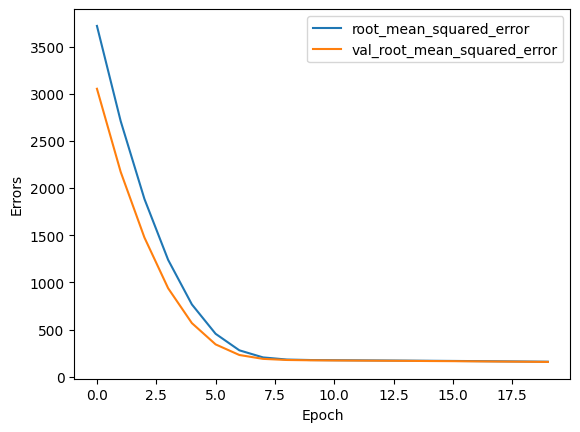

In [10]:
#plotting basic rmse history
rmse = "root_mean_squared_error"
val_rmse = "val_root_mean_squared_error"
charts.plot_training_losses(losses=[rmse, val_rmse], df=hist)

In [15]:
print("Training data metrics:")
training_eval = my_model.evaluate(training_df[my_feature], training_df[my_label])

print("Validation data metrics:")
validate_eval = my_model.evaluate(validation_df[my_feature], validation_df[my_label])

print("Test data metrics:")
test_eval = my_model.evaluate(test_df[my_feature], test_df[my_label])

Training data metrics:
372/372 [==============================] - 1s 4ms/step - loss: 24702.2793 - root_mean_squared_error: 157.1696
Validation data metrics:
107/107 [==============================] - 0s 4ms/step - loss: 24406.5879 - root_mean_squared_error: 156.2261
Test data metrics:
54/54 [==============================] - 0s 4ms/step - loss: 25305.1680 - root_mean_squared_error: 159.0760


In [12]:
#sampling data
sample_training = lib.create_inference_sample(training_df, my_feature, my_model)
sample_validation = lib.create_inference_sample(validation_df, my_feature, my_model)
sample_test = lib.create_inference_sample(test_df, my_feature, my_model)

7/7 [==============================] - 0s 2ms/step


2023-02-18 22:40:33.120345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


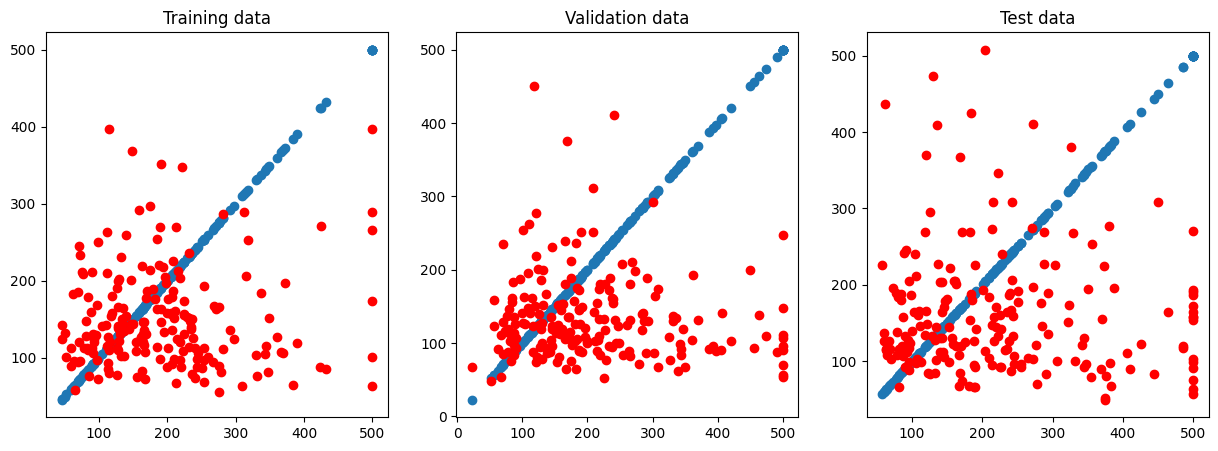

In [13]:
charts.plot_training_test_validat_accuracy(
    dfs=[sample_training, sample_validation, sample_test],
    label_key=my_label
)

In [14]:
#weights per features
weights = pd.DataFrame.from_dict({
    "feature" : my_feature,
    "weight" : my_model.get_weights()[0].ravel(),
    "correlation" : training_df.corr()["median_house_value"].filter(items=my_feature)
})

weights

,feature,weight,correlation
longitude,longitude,-0.035940,-0.042038
latitude,latitude,1.231403,-0.146422
total_rooms,total_rooms,-0.039993,0.123843
total_bedrooms,total_bedrooms,0.236172,0.040221
population,population,-0.007826,-0.030102
households,households,0.188489,0.056379
